In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np

2025-06-13 15:57:43.877922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749830264.091470      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749830264.148000      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**PREPROCESSING DATA**

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/birds-vs-drone-dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/birds-vs-drone-dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 661 images belonging to 1 classes.
Found 165 images belonging to 1 classes.


**MODEL TRANSFER LEARNING**

In [3]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

I0000 00:00:1749830277.976531      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**TRAINING MODEL**

In [4]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1749830290.715945     107 service.cc:148] XLA service 0x7e4924004960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749830290.716684     107 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749830291.629043     107 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/21 ━━━━━━━━━━━━━━━━━━━━ 3:59 12s/step - accuracy: 0.3750 - loss: 0.8005

I0000 00:00:1749830295.121020     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8948 - loss: 0.1386 - val_accuracy: 1.0000 - val_loss: 6.7150e-08
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 548ms/step - accuracy: 1.0000 - loss: 1.0768e-08 - val_accuracy: 1.0000 - val_loss: 6.0574e-09
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 544ms/step - accuracy: 1.0000 - loss: 1.4134e-08 - val_accuracy: 1.0000 - val_loss: 4.1397e-09
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 546ms/step - accuracy: 1.0000 - loss: 9.5464e-09 - val_accuracy: 1.0000 - val_loss: 6.6673e-09
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 553ms/step - accuracy: 1.0000 - loss: 1.1545e-08 - val_accuracy: 1.0000 - val_loss: 2.5347e-09
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 556ms/step - accuracy: 1.0000 - loss: 1.4623e-08 - val_accuracy: 1.0000 - val_loss: 3.8723e-09
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 556ms/step - accuracy: 1.0000 - loss: 3.9837e-09 - val_accuracy: 1.0000 - val_loss: 7.2763e-09
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 549ms/step - accu

**VISUALISASI DAN EVALUASI**

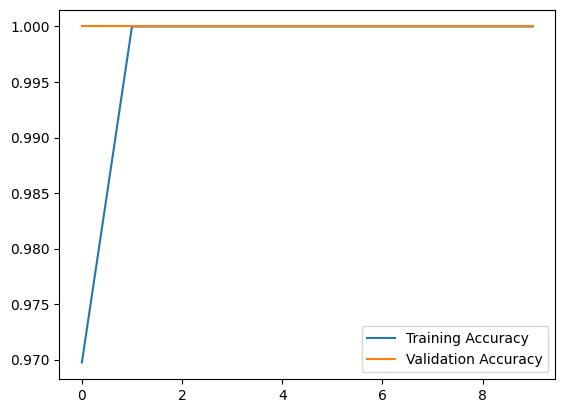

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 824ms/step


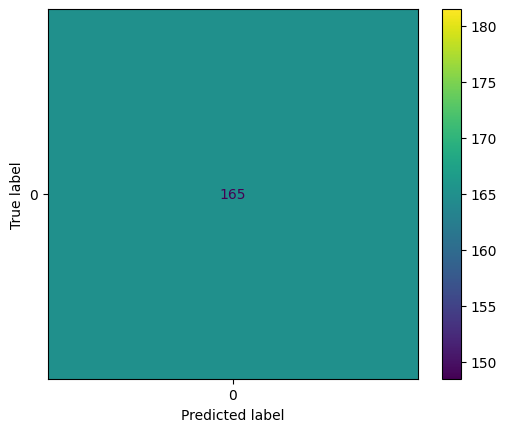

In [5]:
# Akurasi & Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(val_generator)
y_pred_labels = (y_pred > 0.5).astype(int)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_labels)
ConfusionMatrixDisplay(cm).plot()
plt.show()


**CEK ISI FOLDER**

In [8]:
import os

base_path = "/kaggle/input/birds-vs-drone-dataset/BirdVsDrone"
print("Isi folder BirdVsDrone:")
print(os.listdir(base_path))

Isi folder BirdVsDrone:
['Birds', 'Drones']


**RENAME**

In [10]:
import shutil
src_path = "/kaggle/input/birds-vs-drone-dataset/BirdVsDrone"
dst_path = "/kaggle/working/dataset"

os.makedirs(dst_path, exist_ok=True)
shutil.copytree(os.path.join(src_path, "Birds"), os.path.join(dst_path, "bird"))
shutil.copytree(os.path.join(src_path, "Drones"), os.path.join(dst_path, "drone"))

'/kaggle/working/dataset/drone'

**CEK JUMLAH**

In [11]:
for label in os.listdir(dst_path):
    print(f"Jumlah gambar di kelas '{label}':", len(os.listdir(os.path.join(dst_path, label))))

Jumlah gambar di kelas 'bird': 400
Jumlah gambar di kelas 'drone': 428


**DATA GENERATOR**

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% untuk validasi
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/working/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 662 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained layer

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 901ms/step - accuracy: 0.7432 - loss: 0.4759 - val_accuracy: 0.9146 - val_loss: 0.1765
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 566ms/step - accuracy: 0.9527 - loss: 0.1488 - val_accuracy: 0.9390 - val_loss: 0.1418
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 544ms/step - accuracy: 0.9699 - loss: 0.0907 - val_accuracy: 0.9634 - val_loss: 0.1086
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 540ms/step - accuracy: 0.9797 - loss: 0.0573 - val_accuracy: 0.9512 - val_loss: 0.0939
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 528ms/step - accuracy: 0.9891 - loss: 0.0521 - val_accuracy: 0.9451 - val_loss: 0.1153
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - accuracy: 0.9824 - loss: 0.0522 - val_accuracy: 0.9756 - val_loss: 0.0653
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 551ms/step - accuracy: 0.9863 - loss: 0.0454 - val_accuracy: 0.9573 - val_loss: 0.0705
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 530ms/step - accuracy: 0.9767 - loss: 0.0557 - val_accu

**VISUALISASI AKURASI & LOSS**

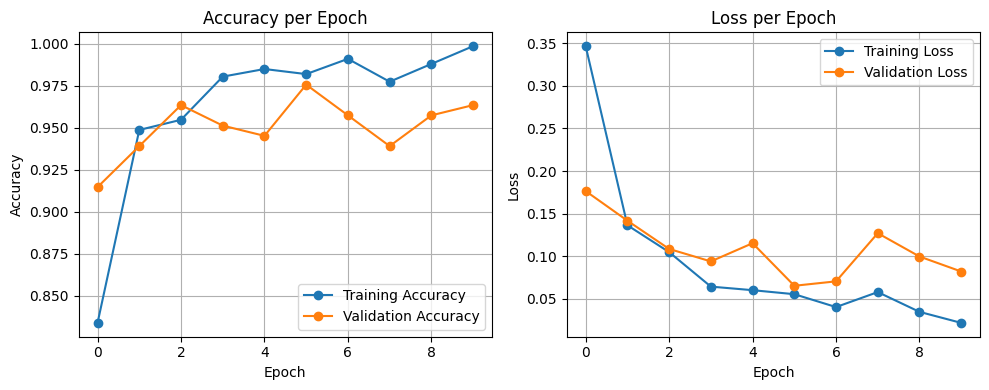

In [15]:
import matplotlib.pyplot as plt

# Visualisasi Akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**CONFUSION MATRIX**

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step


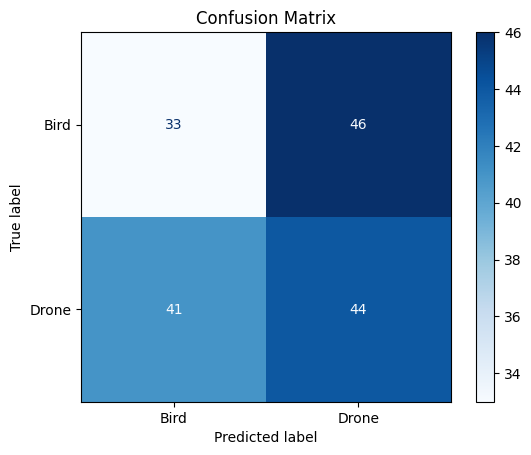

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reset generator untuk prediksi ulang
val_generator.reset()

# Prediksi terhadap data validasi
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bird', 'Drone'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**CLASSIFICATION REPORT**

In [18]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Bird', 'Drone']))

Classification Report:
              precision    recall  f1-score   support

        Bird       0.45      0.42      0.43        79
       Drone       0.49      0.52      0.50        85

    accuracy                           0.47       164
   macro avg       0.47      0.47      0.47       164
weighted avg       0.47      0.47      0.47       164



Unfreeze beberapa layer akhir

In [20]:
# Buka semua layer
base_model.trainable = True

# Hanya fine-tune dari layer ke-100 ke atas (sekitar 20-an layer terakhir)
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Compile Ulang Model (pakai learning rate kecil)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train Ulang Model

In [25]:
fine_tune_epochs = 20
total_epochs = 10 + fine_tune_epochs  # misal sebelumnya kamu training 10 epoch

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 595ms/step - accuracy: 0.9919 - loss: 0.0282 - val_accuracy: 0.9878 - val_loss: 0.0490
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 540ms/step - accuracy: 0.9882 - loss: 0.0416 - val_accuracy: 0.9756 - val_loss: 0.0472
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 538ms/step - accuracy: 0.9871 - loss: 0.0428 - val_accuracy: 0.9939 - val_loss: 0.0233
Epoch 13/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 546ms/step - accuracy: 0.9988 - loss: 0.0257 - val_accuracy: 0.9817 - val_loss: 0.0344
Epoch 14/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 547ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9878 - val_loss: 0.0260
Epoch 15/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 545ms/step - accuracy: 0.9890 - loss: 0.0286 - val_accuracy: 0.9817 - val_loss: 0.0397
Epoch 16/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - accuracy: 0.9880 - loss: 0.0348 - val_accuracy: 0.9878 - val_loss: 0.0281
Epoch 17/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 543ms/step - accuracy: 0.9947 - loss: 0.0248 - 

Visualisasi Akurasi & Loss Gabungan

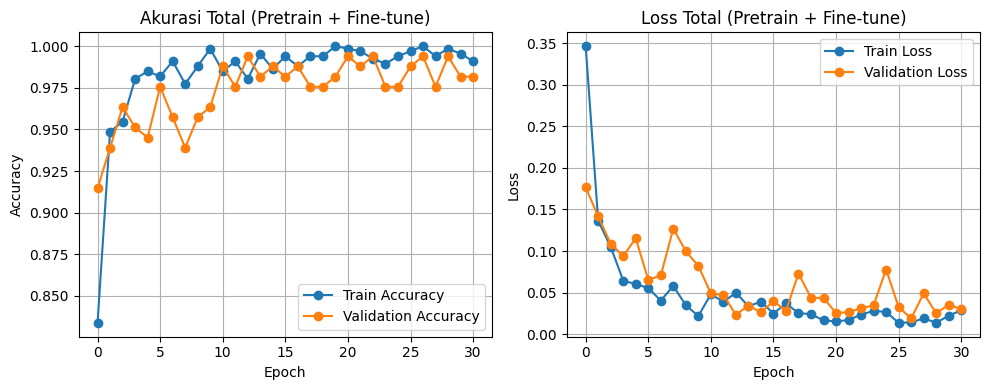

In [26]:
# Gabungkan history awal dan fine-tuned
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.title('Akurasi Total (Pretrain + Fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Loss Total (Pretrain + Fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Evaluasi Ulang: Confusion Matrix & Classification Report

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step


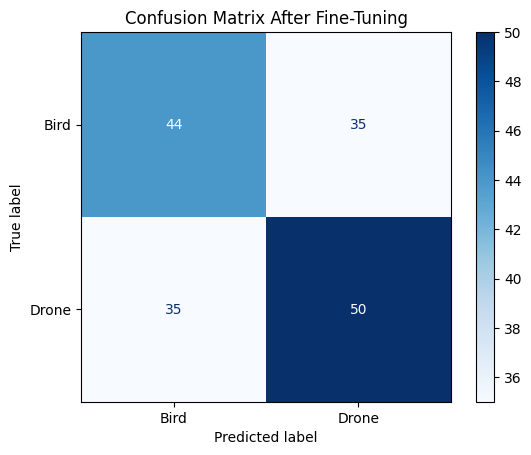

Classification Report (After Fine-Tuning):
              precision    recall  f1-score   support

        Bird       0.56      0.56      0.56        79
       Drone       0.59      0.59      0.59        85

    accuracy                           0.57       164
   macro avg       0.57      0.57      0.57       164
weighted avg       0.57      0.57      0.57       164



In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

val_generator.reset()  # Penting!

# Prediksi ulang
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Bird', 'Drone'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix After Fine-Tuning')
plt.show()

# Classification Report
print("Classification Report (After Fine-Tuning):")
print(classification_report(y_true, y_pred, target_names=['Bird', 'Drone']))